# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [51]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [52]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [54]:
lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

Linear Regression

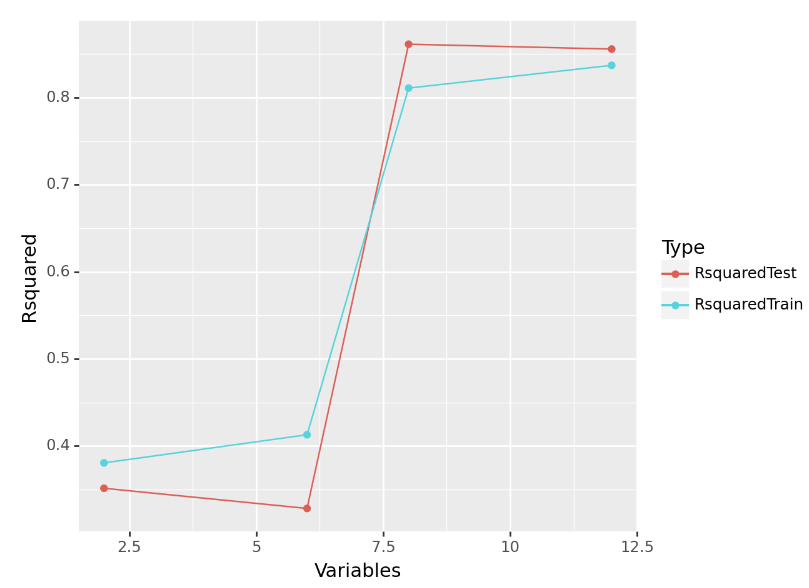

In [62]:
penguins = penguins.dropna()
X = penguins.drop(['bill_depth_mm'], axis=1)
y = penguins['bill_depth_mm']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [64]:
#kNN models

knn= KNeighborsRegressor(n_neighbors=2)

my_pipeline = Pipeline(
    [('preprocessing',ct),('KNN',knn)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
m2rtest = r2_score(y_test, y_preds)

y_preds=fitted_pipeline.predict(X_train)
m2rtrain = r2_score(y_train, y_preds)

In [66]:
trains = [m2rtrain]
tests = [m2rtest]
ks = [2]

knnvals = {'k':ks,'Training':trains,'Testing':tests}
knndf = pd.DataFrame(knnvals)

In [67]:
iv = [10,20,30,50,100]

for i in iv:
  knn= KNeighborsRegressor(n_neighbors=i)

  my_pipeline = Pipeline(
      [('preprocessing',ct),('KNN',knn)]
  )

  fitted_pipeline=my_pipeline.fit(X_train, y_train)
  y_preds=fitted_pipeline.predict(X_test)
  mtest = r2_score(y_test, y_preds)

  y_preds=fitted_pipeline.predict(X_train)
  mtrain = r2_score(y_train, y_preds)

  knndf.loc[len(knndf.index)] = [i, mtrain, mtest]

knndf

,k,Training,Testing
0,2.0,0.937441,0.742484
1,10.0,0.868220,0.829474
2,20.0,0.849331,0.838099
3,30.0,0.818713,0.824378
4,50.0,0.765035,0.798543
5,100.0,0.561874,0.572439


In [68]:
from plotnine import ggplot, aes, geom_point, geom_line, scale_color_identity

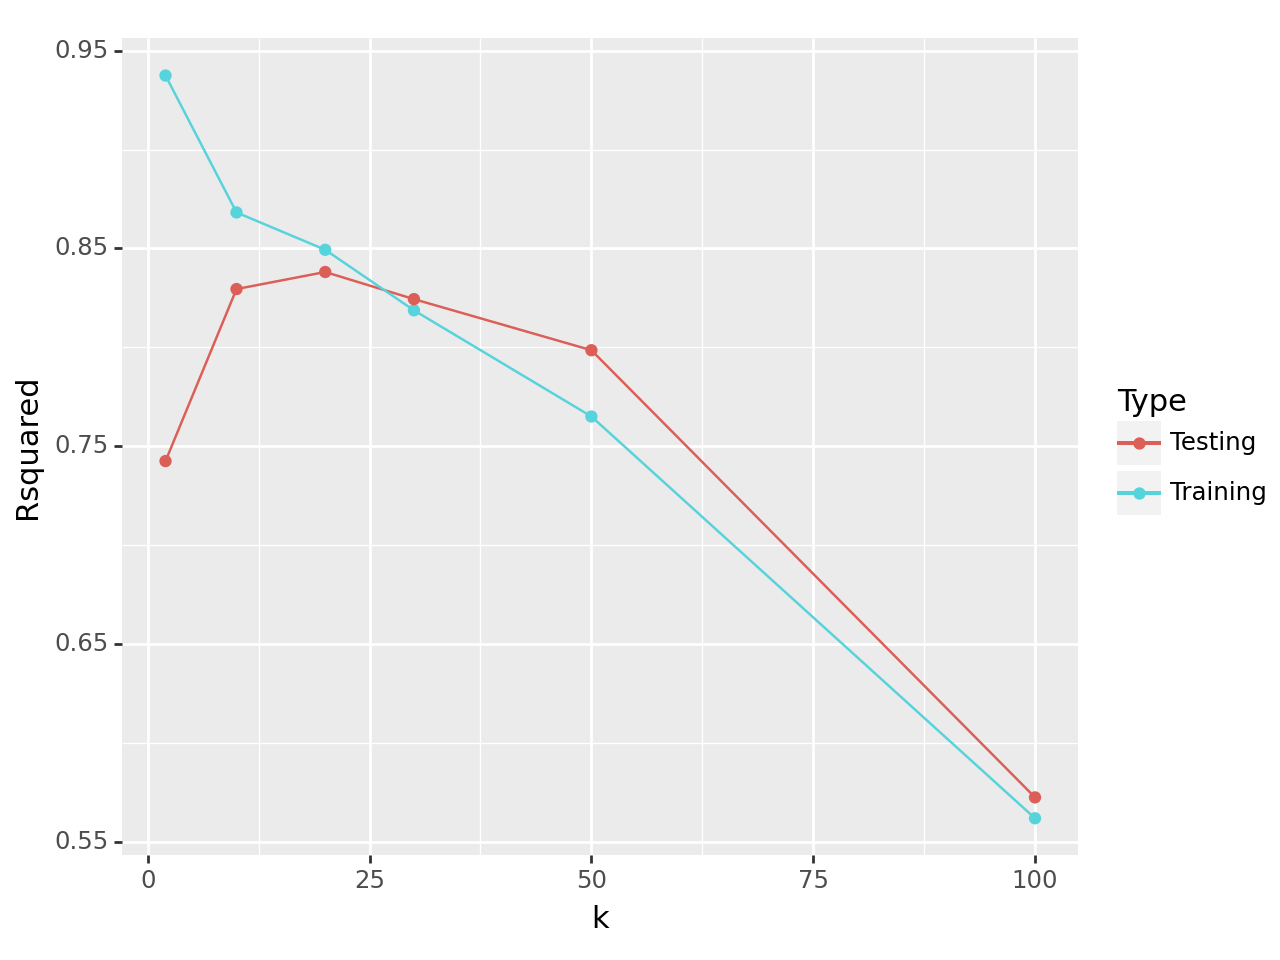

In [69]:
df_melted = knndf.melt(id_vars=['k'],
                    value_vars=['Training', 'Testing'],
                    var_name='Type',
                    value_name='Rsquared')


plot = (ggplot(df_melted)
        + geom_point(aes(x='k', y='Rsquared', color='Type'))
        + geom_line(aes(x='k', y='Rsquared', color='Type', group='Type')))

print(plot)

In [71]:
#Decision Trees
det = DecisionTreeRegressor(min_impurity_decrease=0.01)

my_pipeline = Pipeline(
    [('preprocessing',ct),('DecTrees',det)]
)


fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
m4rtest = r2_score(y_test, y_preds)

y_preds=fitted_pipeline.predict(X_train)
m4rtrain = r2_score(y_train, y_preds)

In [72]:
trains = [m4rtrain]
tests = [m4rtest]
alphas = [0.01]

dtvals = {'alpha':alphas,'Training':trains,'Testing':tests}
dtdf = pd.DataFrame(dtvals)

In [73]:
iv = [0.05,0.1,0.25,0.5,0.7]

for i in iv:
  det = DecisionTreeRegressor(min_impurity_decrease=i)

  my_pipeline = Pipeline(
      [('preprocessing',ct),('DecTrees',det)]
  )

  fitted_pipeline=my_pipeline.fit(X_train, y_train)
  y_preds=fitted_pipeline.predict(X_test)
  mtest = r2_score(y_test, y_preds)

  y_preds=fitted_pipeline.predict(X_train)
  mtrain = r2_score(y_train, y_preds)

  dtdf.loc[len(dtdf.index)] = [i, mtrain, mtest]

dtdf

,alpha,Training,Testing
0,0.01,0.910651,0.801752
1,0.05,0.823295,0.819362
2,0.10,0.823295,0.819362
3,0.25,0.775702,0.759800
4,0.50,0.676758,0.673850
5,0.70,0.676758,0.673850


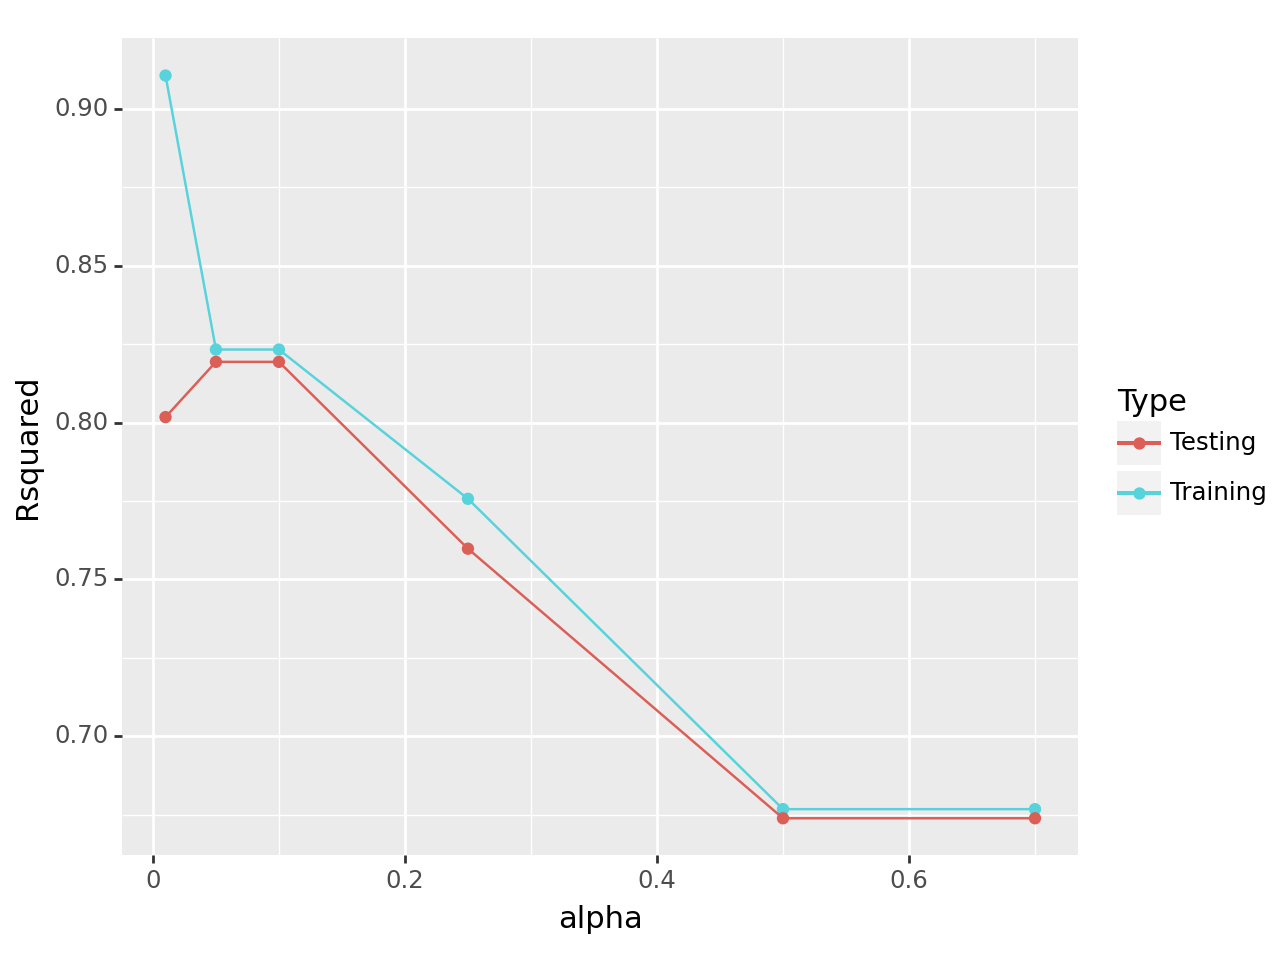

In [74]:
df_melted = dtdf.melt(id_vars=['alpha'],
                    value_vars=['Training', 'Testing'],
                    var_name='Type',
                    value_name='Rsquared')


plot = (ggplot(df_melted)
        + geom_point(aes(x='alpha', y='Rsquared', color='Type'))
        + geom_line(aes(x='alpha', y='Rsquared', color='Type', group='Type')))

print(plot)

On my testing data, my linear regression model with 8 variables did best.